In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("merged_malware_features.csv", low_memory=False)

# Drop identifier columns
if 'file_path' in df.columns:
    df = df.drop(columns=['file_path'])

# Convert all columns to numeric, coercing errors
df = df.apply(pd.to_numeric, errors='coerce')

# Option 1: Drop columns with too many NaNs (e.g., more than 30%)
threshold = 0.3
df = df.loc[:, df.isnull().mean() < threshold]

# Option 2: Drop rows with too many NaNs (e.g., more than 30% missing values)
df = df.loc[df.isnull().mean(axis=1) < threshold]

# Fill remaining NaNs with column means (optional, better than dropping all)
df = df.fillna(df.mean())

# Final shape check
print(f"Final cleaned shape: {df.shape}")
print("Remaining columns:", df.columns[:].tolist())

# Optional: Save cleaned data
df.to_csv("cleaned_malware_features_partial.csv", index=False)


Final cleaned shape: (21125, 263)
Remaining columns: ['file_size', 'entry_point', 'file_entropy', 'byte_freq_00', 'byte_freq_01', 'byte_freq_02', 'byte_freq_03', 'byte_freq_04', 'byte_freq_05', 'byte_freq_06', 'byte_freq_07', 'byte_freq_08', 'byte_freq_09', 'byte_freq_0a', 'byte_freq_0b', 'byte_freq_0c', 'byte_freq_0d', 'byte_freq_0e', 'byte_freq_0f', 'byte_freq_10', 'byte_freq_11', 'byte_freq_12', 'byte_freq_13', 'byte_freq_14', 'byte_freq_15', 'byte_freq_16', 'byte_freq_17', 'byte_freq_18', 'byte_freq_19', 'byte_freq_1a', 'byte_freq_1b', 'byte_freq_1c', 'byte_freq_1d', 'byte_freq_1e', 'byte_freq_1f', 'byte_freq_20', 'byte_freq_21', 'byte_freq_22', 'byte_freq_23', 'byte_freq_24', 'byte_freq_25', 'byte_freq_26', 'byte_freq_27', 'byte_freq_28', 'byte_freq_29', 'byte_freq_2a', 'byte_freq_2b', 'byte_freq_2c', 'byte_freq_2d', 'byte_freq_2e', 'byte_freq_2f', 'byte_freq_30', 'byte_freq_31', 'byte_freq_32', 'byte_freq_33', 'byte_freq_34', 'byte_freq_35', 'byte_freq_36', 'byte_freq_37', 'byte_

In [6]:
df

,file_size,entry_point,file_entropy,byte_freq_00,byte_freq_01,byte_freq_02,byte_freq_03,byte_freq_04,byte_freq_05,byte_freq_06,...,byte_freq_fa,byte_freq_fb,byte_freq_fc,byte_freq_fd,byte_freq_fe,byte_freq_ff,section_0_entropy,section_1_entropy,section_2_entropy,section_3_entropy
0,192660,5040,7.238815,0.130250,0.003395,0.002356,0.003228,0.002237,0.001760,0.002092,...,0.003472,0.011876,0.004760,0.007433,0.006571,0.016812,7.559434,0.042169,1.972038,4.305806
1,16496,6668,6.581416,0.239694,0.006729,0.004547,0.002728,0.006062,0.003637,0.001758,...,0.001697,0.001334,0.002607,0.001273,0.002728,0.018671,6.004662,5.086139,0.384017,5.097979
2,196674,5040,7.148468,0.148032,0.003300,0.002298,0.003158,0.002191,0.001724,0.002064,...,0.003402,0.011639,0.004668,0.007286,0.006447,0.016469,7.558753,0.049219,1.970996,4.305806
3,192653,5040,7.238893,0.130224,0.003395,0.002357,0.003229,0.002237,0.001760,0.002092,...,0.003473,0.011881,0.004760,0.007438,0.006571,0.016813,7.559389,0.042169,1.972038,4.305806
4,256000,141450,6.509421,0.158457,0.003141,0.002445,0.001965,0.001832,0.001848,0.001824,...,0.001262,0.000801,0.001137,0.001199,0.007461,0.131996,6.552859,6.475284,0.101910,4.305806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21120,16128,6668,6.704042,0.219370,0.006944,0.004464,0.002852,0.006138,0.003658,0.001798,...,0.001922,0.001488,0.002852,0.001302,0.003162,0.019097,6.004662,5.086139,0.384017,5.097979
21121,16000,6668,6.688090,0.221125,0.006812,0.005000,0.003000,0.006250,0.003687,0.002000,...,0.001750,0.001437,0.003063,0.001187,0.002875,0.019500,6.004662,5.086139,0.384017,5.097979
21122,192538,5040,7.240497,0.129777,0.003376,0.002342,0.003199,0.002228,0.001740,0.002103,...,0.003480,0.011883,0.004789,0.007432,0.006570,0.016817,7.558616,0.045938,1.966627,4.305806
21123,17120,6668,6.773117,0.213376,0.006834,0.004439,0.002804,0.005783,0.003680,0.001928,...,0.001811,0.001460,0.002979,0.001811,0.003271,0.018341,6.004662,5.086139,0.384017,5.097979


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% variance
df_pca = pca.fit_transform(df_scaled)

print(f"PCA-reduced shape: {df_pca.shape}")

PCA-reduced shape: (21125, 195)


In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=10)
labels = dbscan.fit_predict(df_pca)

df['cluster'] = labels  # -1 = outliers


In [32]:
df = df.copy()  # defragment
print(type(labels))
print(getattr(labels, 'shape', None))
print(type(df['cluster']))
print(getattr(df['cluster'], 'shape', None))



<class 'numpy.ndarray'>
(21125,)
<class 'pandas.core.series.Series'>
(21125,)


In [34]:
# Drop any existing multi-column 'cluster'
if 'cluster' in df.columns:
    df = df.drop(columns=['cluster'])

# Assign 1D labels array as new cluster column
df['cluster'] = labels

# Check counts
print(df['cluster'].value_counts())


cluster
 1     7066
-1     5050
 0     3170
 5     1398
 12     452
       ... 
 60      10
 79      10
 83      10
 84      10
 86      10
Name: count, Length: 91, dtype: int64


In [36]:
noise_points = df[df['cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")

# Optionally explore their features
print(noise_points.describe())


Number of noise points: 5050
          file_size   entry_point  file_entropy  byte_freq_00  byte_freq_01  \
count  5.050000e+03  5.050000e+03   5050.000000   5050.000000   5050.000000   
mean   3.243440e+05  4.430342e+06      6.343113      0.207129      0.009833   
std    2.497267e+05  1.349647e+08      1.268396      0.174214      0.009709   
min    1.344000e+03  0.000000e+00      0.706138      0.004455      0.000274   
25%    9.833275e+04  7.680000e+03      5.660588      0.057878      0.004252   
50%    2.969920e+05  2.856000e+04      6.585798      0.173806      0.007149   
75%    4.679680e+05  9.930200e+04      7.171632      0.299939      0.012525   
max    1.046521e+06  4.290773e+09      7.995855      0.941602      0.348268   

       byte_freq_02  byte_freq_03  byte_freq_04  byte_freq_05  byte_freq_06  \
count   5050.000000   5050.000000   5050.000000   5050.000000   5050.000000   
mean       0.005921      0.005437      0.006925      0.004007      0.004396   
std        0.005170   

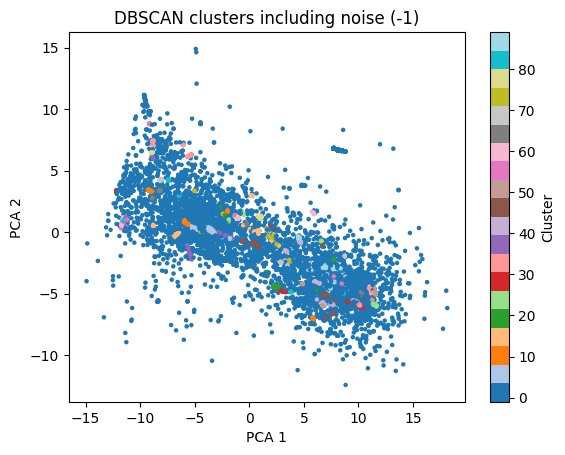

In [38]:
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='tab20', s=5)
plt.title('DBSCAN clusters including noise (-1)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [40]:
noise_df = df[df['cluster'] == -1]
clustered_df = df[df['cluster'] != -1]
noise_df.to_csv('noise_samples.csv', index=False)

## Classifier

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming your cleaned data and labels are:
# df - features DataFrame (numeric, no NaNs)
# labels - 1D array or Series with cluster labels from DBSCAN (-1 = noise)

# Filter out noise points (cluster == -1) if you want a cleaner dataset
mask = labels != -1
X = df[mask]
y = labels[mask]

# Train/test split before scaling and PCA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features (fit scaler only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (fit only on train)
pca = PCA(n_components=0.95)  # keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Predict on test set
y_pred = clf.predict(X_test_pca)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       951
           1       1.00      1.00      1.00      2120
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00       419
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00       136
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00        35
   

## Cross Validation

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X, y are your features and labels

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation, scoring by accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracies:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation accuracies: [1.         1.         0.99968896 1.         1.        ]
Mean accuracy: 0.9999377916018662
Standard deviation: 0.00012441679626751245


# New Section

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       180
           1       1.00      1.00      1.00      6338

    accuracy                           1.00      6518
   macro avg       0.99      0.92      0.96      6518
weighted avg       1.00      1.00      1.00      6518

Confusion Matrix:
 [[ 152   28]
 [   1 6337]]
Cross-validation accuracies: [0.9933272  0.99424626 0.99493671 0.99746835 0.99562716]
Mean accuracy: 0.9951211356871152
Standard deviation: 0.0013987944205839308


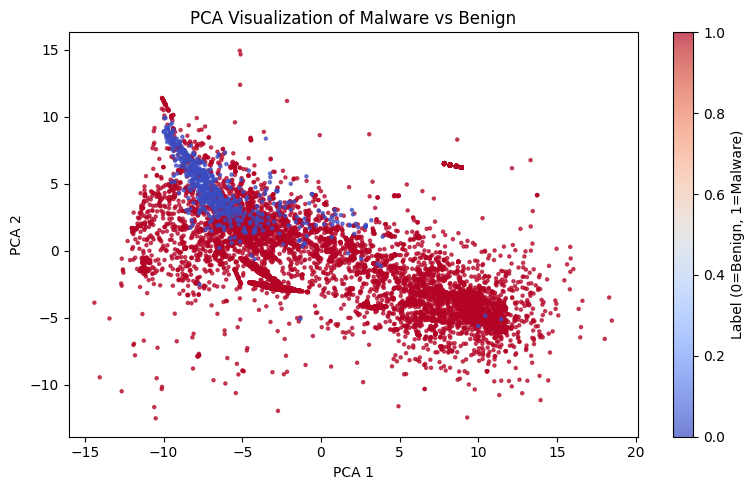

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load datasets
malware_df = pd.read_csv("merged_malware_features.csv", low_memory=False)
benign_df = pd.read_csv("benign_features.csv", low_memory=False)

# Add labels
malware_df["label"] = 1
benign_df["label"] = 0

# Concatenate datasets
df = pd.concat([malware_df, benign_df], ignore_index=True)

# Drop identifier columns if present
if 'file_path' in df.columns:
    df = df.drop(columns=['file_path'])

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop columns and rows with too many NaNs (30% threshold)
threshold = 0.3
df = df.loc[:, df.isnull().mean() < threshold]
df = df.loc[df.isnull().mean(axis=1) < threshold]

# Fill remaining NaNs with column means
df = df.fillna(df.mean())

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(clf, X_pca, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

# Optional: 2D PCA plot
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=5, alpha=0.7)
    plt.title('PCA Visualization of Malware vs Benign')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(label='Label (0=Benign, 1=Malware)')
    plt.tight_layout()
    plt.show()


In [26]:
cluster_profile = df.groupby('cluster').mean()
print(cluster_profile.T)  # transpose for easier reading


cluster                        0             1
file_size          158231.600319  2.309863e+05
entry_point        625986.628456  2.730054e+06
file_entropy            6.830111  5.443555e+00
byte_freq_00            0.189540  3.115934e-01
byte_freq_01            0.005828  1.314277e-02
...                          ...           ...
byte_freq_ff            0.017269  3.896318e-02
section_0_entropy       5.922650  5.218220e+00
section_1_entropy       3.820625  4.213859e+00
section_2_entropy       1.385846  2.266056e+00
section_3_entropy       4.412152  3.945286e+00

[263 rows x 2 columns]


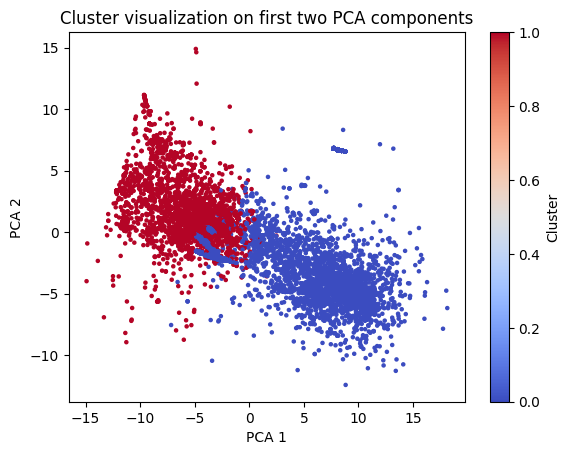

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='coolwarm', s=5)
plt.title('Cluster visualization on first two PCA components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


# Section 2

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# === Load and label datasets ===
malware_df = pd.read_csv("merged_malware_features.csv", low_memory=False)
benign_df = pd.read_csv("benign_features.csv", low_memory=False)

malware_df['label'] = 1
benign_df['label'] = 0

# Combine datasets
df = pd.concat([malware_df, benign_df], ignore_index=True)

# Drop identifier columns
if 'file_path' in df.columns:
    df = df.drop(columns=['file_path'])

# Convert all to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop columns/rows with too many NaNs
threshold = 0.3
df = df.loc[:, df.isnull().mean() < threshold]
df = df.loc[df.isnull().mean(axis=1) < threshold]

# Fill remaining NaNs
df = df.fillna(df.mean())

# === Separate features and label ===
X = df.drop(columns=['label'])
y = df['label']

# === Train/Test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Scale ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === PCA ===
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# === SMOTE for class imbalance ===
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_pca, y_train)

# === Train classifier ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bal, y_train_bal)

# === Predict and evaluate ===
y_pred = clf.predict(X_test_pca)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === Cross-validation ===
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

# === Optional: Save cleaned combined data ===
df.to_csv("cleaned_combined_features.csv", index=False)


C:\Users\Hp\.conda\envs\tf-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       180
           1       1.00      1.00      1.00      6338

    accuracy                           1.00      6518
   macro avg       0.97      0.97      0.97      6518
weighted avg       1.00      1.00      1.00      6518

Confusion Matrix:
 [[ 170   10]
 [  11 6327]]
Cross-validation accuracies: [0.99677865 0.9976985  0.99746835 0.9990794  0.99838895]
Mean accuracy: 0.9978827719840261
Standard deviation: 0.0007890411904402059


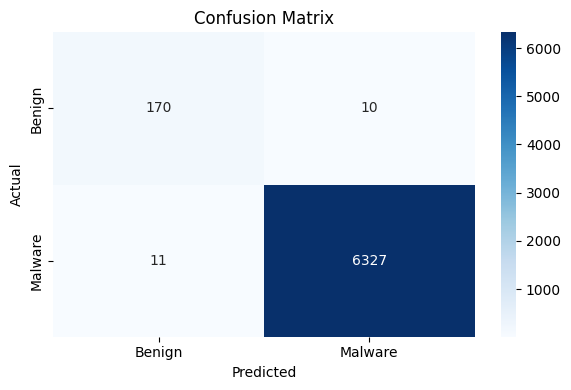

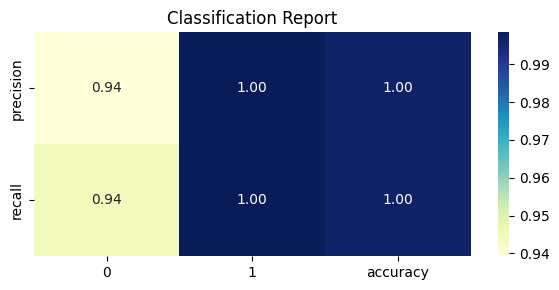

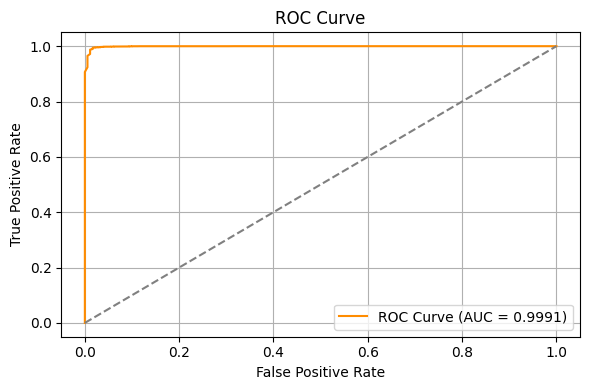

Exported: rf_model.pkl, scaler.pkl, pca.pkl


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# === Load required objects from memory (you must pass them in or save them to use here) ===
# Replace these with actual objects from your previous script if running all at once
# Example (if saved):
# from train_script import clf, scaler, pca, X_test_pca, y_test, y_pred

# If running immediately after training, you can pass in: clf, scaler, pca, X_test_pca, y_test, y_pred
# Otherwise, load them below

# === Assume these variables already exist in memory ===
# - clf (trained RandomForestClassifier)
# - scaler (StandardScaler object)
# - pca (PCA object)
# - X_test_pca (PCA-transformed test data)
# - y_test (true labels)
# - y_pred (predicted labels from model)

# === Visualization 1: Confusion Matrix ===
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# === Visualization 2: Classification Report ===
def plot_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).iloc[:2, :3]  # Only class 0 & 1
    plt.figure(figsize=(6, 3))
    sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Classification Report")
    plt.tight_layout()
    plt.show()

# === Visualization 3: ROC Curve ===
def plot_roc_curve(clf, X_test_pca, y_test):
    y_scores = clf.predict_proba(X_test_pca)[:, 1]  # Probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

# === Export Model & Preprocessing Tools ===
def export_model_pipeline(clf, scaler, pca):
    joblib.dump(clf, "rf_model.pkl")
    joblib.dump(scaler, "scaler.pkl")
    joblib.dump(pca, "pca.pkl")
    print("Exported: rf_model.pkl, scaler.pkl, pca.pkl")

# === Execute all ===
def main(clf, scaler, pca, X_test_pca, y_test, y_pred):
    plot_confusion_matrix(y_test, y_pred)
    plot_classification_report(y_test, y_pred)
    plot_roc_curve(clf, X_test_pca, y_test)
    export_model_pipeline(clf, scaler, pca)

# === If you're running this script standalone, define/import the following: ===
main(clf, scaler, pca, X_test_pca, y_test, y_pred)
